In [134]:
#sprawdzenie czy jest wielokatem prostym
def czy_wielokat(wielokat):
    return len(set(wielokat)) > 2

def czy_nie_zachodza(wielokat):
    return len(wielokat) == len(set(wielokat))

def ekstrema(wielokat):
    dol = min(p[1] for p in wielokat)
    szczyt = max(p[1] for p in wielokat)
    return dol, szczyt

def skret_w_prawo(p1, p2, p3):
    return (p3[0] - p1[0])*(p2[1] - p1[1]) > (p2[0] - p1[0])*(p3[1] - p1[1])

def przejdz_wielokat(w):
    dol, szczyt = ekstrema(w
    n = len(w)
    for i in range(n):
        pop = w[(i-1)%n]
        srod = w[i]
        nast = w[(i+1)%n]
        nastn = w[(i+2)%n]
        if skret_w_prawo(pop, srod, nast):
            if srod[1] < pop[1] and srod[1] < nast[1] and srod[1] < szczyt: szczyt = srod[1]
            elif srod[1] > pop[1] and srod[1] > nast[1] and srod[1] > dol: dol = srod[1]
            elif pop[1] < srod[1] and nastn[1] < srod[1] and srod[1] > pop[1] and srod[1] == nast[1] and srod[1] > dol: dol = srod[1]
            elif pop[1] > srod[1] and nastn[1] > srod[1] and srod[1] > pop[1] and srod[1] == nast[1] and srod[1] < szczyt: szczyt = srod[1]
    return dol, szczyt

def czy_posiada(wielokat):
    #if czy_wielokat(wielokat) and czy_nie_zachodza(wielokat):
    if czy_wielokat(wielokat):
        dol, szczyt = przejdz_wielokat(wielokat)
        return dol < szczyt
    return False

In [135]:
def przeciecie(p, nast, prosta):
    if nast[0] != p[0]:
        a = (nast[1] - p[1])/(nast[0] - p[0])
        b = p[1] - a * p[0]
        x = (prosta-b)/a
        return (x, prosta)
    else: return (nast[0], prosta)

def jadro(w):
    jadro = []
    dol, szczyt = przejdz_wielokat(w)
    n = len(w)
    for i in range(n):
        p = w[i]
        nast = w[(i+1)%n]
        # jeśli punkt leży na prostej
        if p[1] >= dol and p[1] <= szczyt: jadro.append(p)
        # jeśli odcinek idzie "z góry na dół" najpierw zapiszemy ewentualne przeciecie z górną prostą, potem z niższą
        if p[1] < nast[1]:
            # jesli przecina dolna prostą
            if ((p[1] < dol) and (nast[1] > dol)): jadro.append(przeciecie(p, nast, dol))
            # jesli przecina gorna prostą
            if (p[1] < szczyt) and (nast[1] > szczyt): jadro.append(przeciecie(p, nast, szczyt))
        # jeśli odcinek idzie z dołu w górę - najpierw zapiszemy ewentualne przecięcie z dolną prostą
        if p[1] > nast[1]:
            if (p[1] > szczyt) and (nast[1] < szczyt): jadro.append(przeciecie(p, nast, szczyt))
            if ((p[1] > dol) and (nast[1] < dol)): jadro.append(przeciecie(p, nast, dol))
    return jadro

In [136]:
def pole(w):
    p = 0
    n = len(w)
    for i in range(n): p += w[i][0]*w[(i+1)%n][1] - w[i][1]*w[(i+1)%n][0]
    return abs(p)/2

In [137]:
import math

def obwod(w):
    o = 0.0
    n = len(w)
    for i in range(n): o += math.sqrt((w[(i+1)%n][0]-w[i][0])*(w[(i+1)%n][0]-w[i][0])+(w[(i+1)%n][1]-w[i][1])*(w[(i+1)%n][1]-w[i][1]))
    return o

In [138]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

def jadro_w(wielokat):
    if czy_posiada(wielokat):
        dol, szczyt = przejdz_wielokat(wielokat)
        x_dol = [1, 8]
        y_dol = [dol, dol]
        plt.plot(x_dol, y_dol, 'r')
        x_szczyt = [1, 8]
        y_szczyt = [szczyt, szczyt]
        plt.plot(x_szczyt, y_szczyt, 'r')
        print("proste y ograniczające jądro:", przejdz_wielokat(wielokat))
        print("punkty wyznaczające jądro:", jadro(wielokat))
        print("pole wielokata:", pole(wielokat))
        print("pole jądra:", pole(jadro(wielokat)))
        print("obwod wielokata:", obwod(wielokat))
        print("obwod jądra:", obwod(jadro(wielokat)))
    else: print("nie mamy do czynienia z poprawnym wielokątem prostym")
    x,y = Polygon(wielokat).exterior.xy
    plt.plot(x,y)
    plt.plot()

In [139]:
wielokat1 = [(2,3), (4, 1), (5, 2), (6, 1), (7, 8), (5, 6), (3, 7)]
wielokat2 = [(2, 3), (4, 1), (6, 3), (4, 5)]
wielokat3 = [(2, 3), (3, 3), (3, 2), (3, 3), (4, 3), (3, 3), (3, 4), (3, 3)]
wielokat4 = [(0,0), (2,0), (2,1), (0, 1)]
wielokat5 = [(1,4), (1,1), (2,2), (3,1), (3,4), (2,3)]
wielokat6 = [(1,2), (2,1), (3,2), (2, 3)]
wielokat7 = [(2,4), (3, 1), (4, 3), (5, 1), (4, 4), (3, 2)]
wielokat8 = [(1, 3), (1, 1), (2, 1), (2, 2), (3, 2), (3, 1), (4, 1), (4, 3), (2.5, 4)]

proste y ograniczające jądro: (2, 6)
punkty wyznaczające jądro: [(2, 3), (3.0, 2), (5, 2), (6.142857142857143, 2), (6.714285714285714, 6), (5, 6), (2.75, 6)]
pole wielokata: 20.5
pole jądra: 16.089285714285715
obwod wielokata: 21.915522789221498
obwod jądra: 15.654295816938042


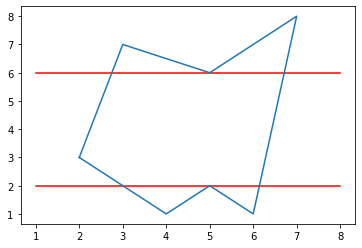

In [140]:
jadro_w(wielokat1)

proste y ograniczające jądro: (1, 5)
punkty wyznaczające jądro: [(2, 3), (4, 1), (6, 3), (4, 5)]
pole wielokata: 8.0
pole jądra: 8.0
obwod wielokata: 11.313708498984761
obwod jądra: 11.313708498984761


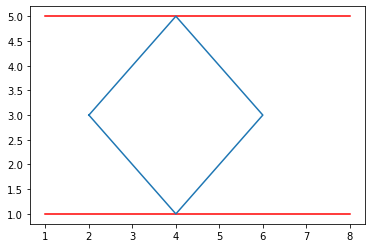

In [141]:
jadro_w(wielokat2)

proste y ograniczające jądro: (2, 4)
punkty wyznaczające jądro: [(2, 3), (3, 3), (3, 2), (3, 3), (4, 3), (3, 3), (3, 4), (3, 3)]
pole wielokata: 0.0
pole jądra: 0.0
obwod wielokata: 8.0
obwod jądra: 8.0


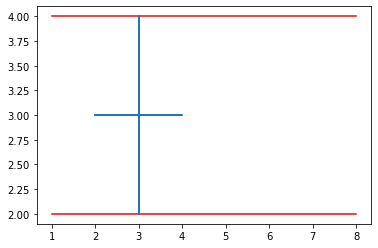

In [142]:
jadro_w(wielokat3)

proste y ograniczające jądro: (0, 1)
punkty wyznaczające jądro: [(0, 0), (2, 0), (2, 1), (0, 1)]
pole wielokata: 2.0
pole jądra: 2.0
obwod wielokata: 6.0
obwod jądra: 6.0


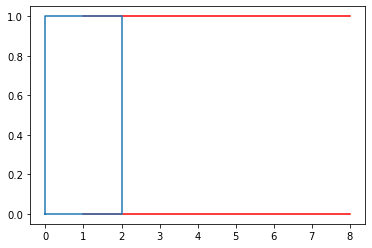

In [143]:
jadro_w(wielokat4)

proste y ograniczające jądro: (2, 3)
punkty wyznaczające jądro: [(1, 3), (1, 2), (2, 2), (3, 2), (3, 3), (2, 3)]
pole wielokata: 4.0
pole jądra: 2.0
obwod wielokata: 11.656854249492381
obwod jądra: 6.0


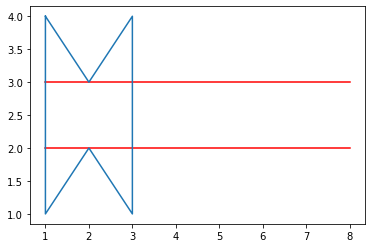

In [144]:
jadro_w(wielokat5)

nie mamy do czynienia z poprawnym wielokątem prostym


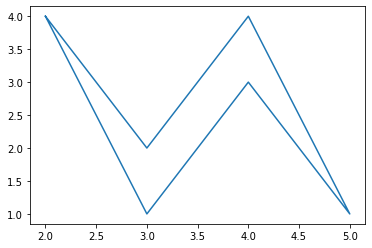

In [145]:
jadro_w(wielokat7)

proste y ograniczające jądro: (1, 4)
punkty wyznaczające jądro: [(1, 3), (1, 2), (3, 2), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3), (4, 3), (2.5, 4)]
pole wielokata: 6.5
pole jądra: 6.5
obwod wielokata: 12.605551275463988
obwod jądra: 12.605551275463988


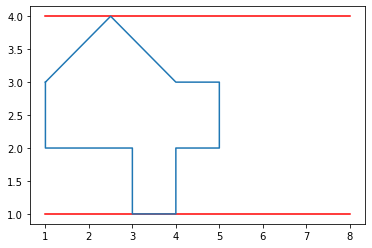

In [146]:
wielokat9 = [(1, 3), (1,2), (3, 2), (3, 1), (4, 1), (4,2), (5,2), (5,3), (4, 3), (2.5, 4)]
jadro_w(wielokat9)


proste y ograniczające jądro: (2, 4)
punkty wyznaczające jądro: [(1, 3), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (4, 3), (2.5, 4)]
pole wielokata: 7.0
pole jądra: 5.5
obwod wielokata: 13.605551275463988
obwod jądra: 10.605551275463988


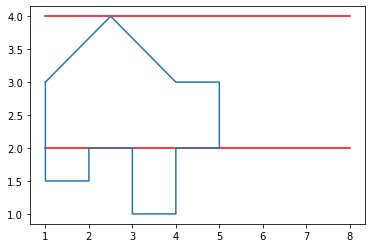

In [149]:
wielokat10 = [(1, 3), (1,1.5), (2, 1.5), (2, 2), (3, 2), (3, 1), (4, 1), (4,2), (5,2), (5,3), (4, 3), (2.5, 4)]
jadro_w(wielokat10)